<a href="https://colab.research.google.com/github/s1c5000/Books/blob/main/handson/%EC%BC%80%EB%9D%BC%EC%8A%A4%EB%A5%BC_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%86%8C%EA%B0%9C_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10 장은 인공신경망의 큰 흐름을 설명한다.  
용어도 집중해서 보는것이 좋다.  
모델을 함수형 API, 서브클래싱 API 로 구현하는 것이 도움이 많이 됐다.

## 퍼셉트론
TLU기반  
입력과 출력이 숫자  
각 연결은 가중치와 연결되어 있다.  
출력은 계단함수를 적용해 출력  
https://sacko.tistory.com/10



## 완전연결층(밀집층),(FCL)
한층에 있는 모든뉴련이 이전층의 모든 뉴런과 연결되어있다.  

완전연결층 출력계산  
**$ h_{w,b} (X) = \phi(XW + b) $**  

X : 입력, 행은 샘플, 열은 특성  
W : 가중치 , 행은 입력뉴런, 열은 출력층 뉴런에 해당  
b : 편향, 뉴런마다 하나씩 있다  
$\phi$ : 활성화 함수

## 퍼셉트론 훈련방법  
가중치 업데이트  
$W_{i,j} = W_{i,j} + \mu(y_i - \hat{y_i})x_i$  


$y_i$는 정답  
$\hat{y_i}$는 출력값  
$\mu$는 학습률  


오차가 감소하는 방향으로 W를 업데이트

## 다층 퍼셉트론 
하지만 각 출력 뉴런의 결정 경계는 선형이여서 XOR같은 간단한 문제를 풀지못함  
퍼셉트론을 여러개 쌓아올리면 XOR문제 풀 수 있다.  
퍼셉트론을 여러개 쌓아올린걸 다층 퍼셉트론이라 한다.  

입력층 : 입력이 들어오는 층  
출력층 : 목적에 맞는 출력으로 내보낸다  
은닉층 : 입력층과 출력층 사이에 퍼셉트론으로 구성된 층


## 심층신경망(DNN)
은닉층을 여러개 쌓아올린 인공신경망  



## 역전파 
다층퍼셉트론을 훈련시킬 수 있는 방법  
정방향, 역방향으로 층을 두번 통과하면서 모든 모델 파라미터 수정  
역전파관련 자세한 설명 : https://bskyvision.com/718

# 모델구현
1. 모델정의  
2. 모델 컴파일  
3. 학습
  
순으로 이루어진다

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# 검증데이터를 만들고 정규화 해준다.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Cost","Sandal","shirt","Sneaker","Bag","Ankle boot"]

1. 모델정의

In [ ]:
# 모델 정의
model = keras.models.Sequential() # 시퀀셜 API 사용
model.add(keras.layers.Flatten(input_shape = [28,28,1])) # 입력 스케일이 1차원이므로 1은 생갹해도 된다 [28,28] 가능
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*300 + 300 # 784개의 데이터(X) * 300 개의 가중치(W) + 300개의 편향(b)  => WX + b

235500

In [ ]:
300 * 100 + 100 # 윗층에서 나온 300개의 데이터(X) * 100개의 가중치(W) + 100개의 편향(b)  => W(X) + b

30100

In [ ]:
100 * 10 + 10

1010

2. 모델 컴파일  
손실함수와 옵티마이져(학습에 사용하는 알고리즘) 지정

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = 'sgd',
              metrics=["accuracy"])

3. 모델 훈련  
훈련데이터와 라벨링 넣어줌  
epochs(반복횟수) 지정  
검증세트 지정 가능

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0188 - accuracy: 0.6792 - val_loss: 0.4976 - val_accuracy: 0.8346
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5016 - accuracy: 0.8265 - val_loss: 0.4614 - val_accuracy: 0.8432
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4471 - accuracy: 0.8451 - val_loss: 0.4761 - val_accuracy: 0.8282
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4138 - accuracy: 0.8547 - val_loss: 0.4228 - val_accuracy: 0.8472
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3999 - accuracy: 0.8582 - val_loss: 0.3952 - val_accuracy: 0.8618
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3789 - accuracy: 0.8666 - val_loss: 0.3857 - val_accuracy: 0.8620
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3683 - accuracy: 0.8705 - val_loss: 0.3746 - val_accuracy:

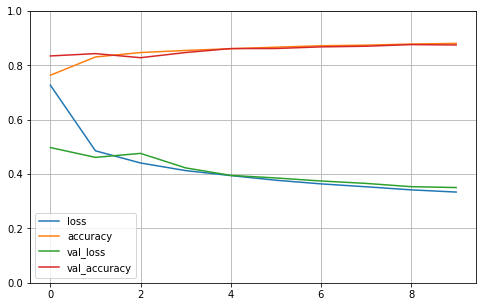

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직축의 범위를 0~1 사이로 설정
plt.show()

test

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.6835 - accuracy: 0.1000


[2.6835386753082275, 0.10000000149011612]

## 함수형 API 사용  
순차적이지 않은 신경망을 만들때 사용  
들어올 층을 인자로 사용  
모델정의시 inputs과 outputs 인자로 사용 

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # 입력층
hidden1 = keras.layers.Dense(30, activation = "relu")(input_) # 인풋과 이어지는 은닉층
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1) # 은닉층1과 이어지는 은닉층 2
concat = keras.layers.Concatenate()([input_,hidden2]) # 입력층과 은닉층2 합침합침
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

1. input객체를 만든다. shape와 dtype정의 한 모델은 여러개의 입력을 가질 수 잇다.
2. 30개의 뉴런과 relu를 가진 Dense층을 만든다. 이 층은 만들어지자마자 입력과 함께 함수처럼 호출된다. 함수형 API라고 부르는이유다. 
3. 두번째 은닉층을 만들고 함수처럼 호출한다.
4. concatnate 층을 만들고 함수처럼 호출해서 두번째은닉층의 출력과 입력을 연결한다. keras.layers.concatenate()함수는 Concatenate층을 만들고 주어진 입력으로 바로 호출한다.
5. 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate층이 만든 결과를 사용해 호출
6. 사용할 입력과 출력을 지정하여 케라스 Model을 만든다

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 28, 30)       870         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 28, 30)       930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_1[0][0]                    
                                                                 dense_4[0][0]                

입력과 출력은 각각 []로 묶어 여러개 전달 할 수 있다.

## 서브클래싱 API로 동적모델 만들기

동적인 구조를 필요로 하는 모델은 서브클래싱 API 사용한다     
Model 클래스를 상속받아 생성자 안에 필요한 층을 만든다     
그 후 call()메서드 안에 수행하려는 연산을 기술

In [ ]:
class WideAndDeepModel(keras.models.Model):# keras 모델을 상속받는다.
    def __init__(self, units=30, activation="relu", **kwargs):# 키워드 파라미터, key=value 형태로 호출함
        super().__init__(**kwargs)#표준 매개변수를 처리한다 ex(name)
        # 정의하지 않은 파라미터 부모것을 사용한다
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs): # 수향하려는 연산 기입, input을 매개변수로 받는다.
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B) # wide
        hidden2 = self.hidden2(hidden1) # deep
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

함수형 API와 비슷하지만 Input클래스의 객체를 만들지않고 call()메서드의 input매개변수를 사용한다.     
주된 차이는 call()메서드 안에서 for, if문같은 텐서플로우 저수준 연산을 사용할 수 있다.

유연성이 높아졌지만 구조가 call()안에 있어서 분석이 어려움, 모델을 저장, 복사할 수 없다. summary()로도 층간 목록만 나오고 층 간의 연결 정보는 볼 수 없다. 

## 콜백사용
fit() 메서드의 callbacks메개변수를 사용하여 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있다. 또는 에포크의 시작, 끝, 배치 처리 전,후 도 가능하다      
ModelCheckpoint는 일정한 간격으로 모델의 체크포인트를 저장한다 기본적으로 매 애포크의 끝에서 호출된다

In [ ]:
#[....] # 모델을 만들고 컴파일 하기
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# 기본적으로 매 애포크의 끝에호출
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_callback.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

훈련하는 동안 검증세트를 사용한면 ModelCheckpoint를 만들때 save_best_only = true로 지정이 가능하다.      
이렇게 하면 최상의 검증 세트 점수에서만 모델을 저장한다.      
조기 종료도 구현가능하다

In [ ]:
#[....] # 모델을 만들고 컴파일 하기
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_callback_best.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), # 검증세트있어야 save_best_only 사용가능
                    callbacks=[checkpoint_cb])

# 정리

계층구조는 심층신경망이 좋은 솔루션으로 빨리수렴하게끔 도와주고 새로운 데이터에 일반화 되는 능력도 향상시켜준다.

닉층의 구성은 각층의 뉴런을 점점 줄여 깔때기처럼 구성한다. 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문이다.

하지만 요즈음 일반적인 구성은 아니다. 대부분의 경우 모든 은닉층에서 같은 크기를 사용해도 동일하거나 더 나은 성능을 낸다.

조기종료나 규제기법을 사용하는것이 효과적이다.

최적의 학습률은 손실이 다시 커지는 지점보다 조금 아래있다.(일반적으로 상승점보다 약 10배 낮은 지점이다)

배치크기는 모델 성능과 훈련 시간에 큰 영향을 미칠 수 있다.

GPU 램에 맞는 가장 큰 배치크기를 사용하는것이 권장된다.
하지만 실전에서 큰 배치를 사용하면 특히 훈련 초기에 종종 불안정하게 훈련된다. 배치크기는 작게사용하라는 것과 크게 사용하라는 것 의견이 많이나뉜다. 둘다 해보는것이 중요

일반적으로 ReLU함수가 모든 은닉층에 좋은 기본값이다. 출력층의 활성화 함수는 수행하는 작업에따라 달라진다.

대부분의 경우 반복횟수는 튜닝하지 않는다. 대신 조기종료를 사용한다.
